In [1]:
import pandas as pd
import seaborn as sns

C:\Users\abhij\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# input
x=df.drop('Outcome', axis=1)

# output
y=df['Outcome']

<AxesSubplot:xlabel='Outcome', ylabel='count'>

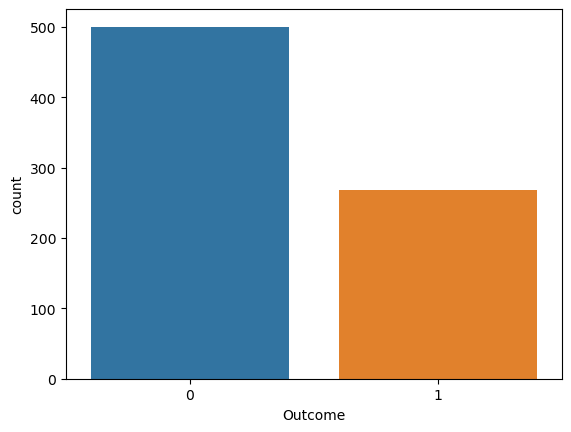

In [6]:
sns.countplot(x=y)

In [8]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scales=scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y,random_state=0, test_size=0.25)

In [10]:
x.shape

(768, 8)

In [20]:
# knn 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

C:\Users\abhij\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
# perform splitting
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [25]:
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy score:  0.7552083333333334
Precision score:  0.631578947368421
Recall score:  0.5806451612903226
F1 score:  0.6050420168067226


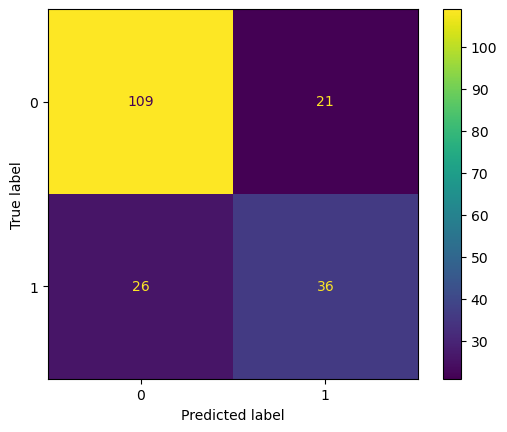

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       130
           1       0.63      0.58      0.61        62

    accuracy                           0.76       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.75      0.76      0.75       192

